In [90]:
import pandas as pd 
from googletrans import Translator
import re
import string
from spellchecker import SpellChecker
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,roc_auc_score
from time import time
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Create an empty list to store the dataframes
dfs = []

# Loop over the range of your file numbers
for i in range(1, 41):  # Change 41 to the number of files + 1
    # Read the file and assign the post number
    df = pd.read_csv(f'poste{i}.csv')
    df = df.assign(Posts=f'poste{i}')
    
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all dataframes in the list
df = pd.concat(dfs)

In [3]:
df

,User Id,Username,Comment Id,Comment Text,Profile URL,Avatar URL,Date,Posts
0,56196056264,bhagvanjondhale14,17928322046763453,Namo buddhay,https://www.instagram.com/bhagvanjondhale14,https://instagram.ftun20-1.fna.fbcdn.net/v/t51...,08/04/2024 09:33:20,poste1
1,7747863224,way_snel,18024191462095093,Suparb 😍,https://www.instagram.com/way_snel,https://instagram.fixc1-2.fna.fbcdn.net/v/t51....,08/04/2024 10:09:25,poste1
2,62769710119,khimhunmunbok,17935581062728952,NaN,https://www.instagram.com/khimhunmunbok,https://instagram.fixc1-2.fna.fbcdn.net/v/t51....,08/04/2024 13:07:49,poste1
3,63880055380,manojlashyapmanoj,18055019746524974,👏♥️,https://www.instagram.com/manojlashyapmanoj,https://instagram.ftun20-1.fna.fbcdn.net/v/t51...,08/04/2024 14:45:05,poste1
4,63509670413,jaikumarjai615,17949261464787737,So beautiful,https://www.instagram.com/jaikumarjai615,https://instagram.ftun20-1.fna.fbcdn.net/v/t51...,08/04/2024 16:58:00,poste1
...,...,...,...,...,...,...,...,...
81,40008485274,rozy.gram,17977084703222832,@datpham2725 do u have some ability?😂,https://www.instagram.com/rozy.gram,https://instagram.ftun8-1.fna.fbcdn.net/v/t51....,17/05/2023 03:26:09,poste40
82,40008485274,rozy.gram,18057702976408217,@lihayul 사 랑 해🩵,https://www.instagram.com/rozy.gram,https://instagram.ftun8-1.fna.fbcdn.net/v/t51....,17/05/2023 03:26:24,poste40
83,40008485274,rozy.gram,18363366061045474,@jy_s93 디지털 한복이라서 더🔥,https://www.instagram.com/rozy.gram,https://instagram.ftun8-1.fna.fbcdn.net/v/t51....,17/05/2023 03:27:07,poste40
84,40008485274,rozy.gram,18072335512371314,@top_girl_y 꺄❤️❤️,https://www.instagram.com/rozy.gram,https://instagram.ftun8-1.fna.fbcdn.net/v/t51....,17/05/2023 03:27:17,poste40


In [4]:
df.shape

(3684, 8)

In [5]:
df.dtypes

User Id          int64
Username        object
Comment Id       int64
Comment Text    object
Profile URL     object
Avatar URL      object
Date            object
Posts           object
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M:%S')

In [7]:
df.dtypes

User Id                  int64
Username                object
Comment Id               int64
Comment Text            object
Profile URL             object
Avatar URL              object
Date            datetime64[ns]
Posts                   object
dtype: object

In [8]:
df.isnull().sum()

User Id          0
Username         0
Comment Id       0
Comment Text    66
Profile URL      0
Avatar URL       0
Date             0
Posts            0
dtype: int64

In [9]:
df = df.dropna(subset=['Comment Text'])

In [13]:
df = df.drop(['Profile URL'], axis=1)
df = df.drop(['Avatar URL'], axis=1)
df = df.drop(['Username'], axis=1)
df = df.drop(['User Id'], axis=1)

KeyError: "['Profile URL'] not found in axis"

In [14]:
df = df.drop(['Comment Id'], axis=1)
df = df.drop(['Posts'], axis=1)

In [15]:
df

,Comment Text,Date
0,Namo buddhay,2024-04-08 09:33:20
1,Suparb 😍,2024-04-08 10:09:25
3,👏♥️,2024-04-08 14:45:05
4,So beautiful,2024-04-08 16:58:00
5,Beautiful looking,2024-04-08 19:02:31
...,...,...
81,@datpham2725 do u have some ability?😂,2023-05-17 03:26:09
82,@lihayul 사 랑 해🩵,2023-05-17 03:26:24
83,@jy_s93 디지털 한복이라서 더🔥,2023-05-17 03:27:07
84,@top_girl_y 꺄❤️❤️,2023-05-17 03:27:17


In [16]:
df.rename(columns={'Comment Text':'Comments'},inplace=True)

In [18]:
# Create a translator object
translator = Translator()

# Define a function to translate text
def translate_text(text):
    try:
        return translator.translate(text, dest='en').text 
    except Exception as e:
        print(f"Error translating text: {e}")
        return text  # return the original text if translation fails

# Apply the function to the 'Comment Text' column
df['Comments'] = df['Comments'].apply(translate_text)

# Now, all comments are translated to English
print(df['Comments'])

Error translating text: _ssl.c:989: The handshake operation timed out
Error translating text: timed out
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Tr

In [19]:
df

,Comments,Date
0,Name,2024-04-08 09:33:20
1,Suparb 😍,2024-04-08 10:09:25
3,👏♥️,2024-04-08 14:45:05
4,So beautiful,2024-04-08 16:58:00
5,Beautiful looking,2024-04-08 19:02:31
...,...,...
81,@datpham2725 do u have some ability?😂,2023-05-17 03:26:09
82,@lihayul,2023-05-17 03:26:24
83,@jy_s93 Digital hanbok is more 🔥,2023-05-17 03:27:07
84,@top_girl_y 꺄❤️❤️,2023-05-17 03:27:17


In [27]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove emojis and other special characters
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    
    # Spell checking and correction
    spell = SpellChecker()
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_word = spell.correction(word)
            # Check if corrected_word is not None
            if corrected_word is not None:
                corrected_text.append(corrected_word)
            else:
                corrected_text.append(word)
        else:
            corrected_text.append(word)
    text = " ".join(corrected_text)
    
    # Removing unreadable words
    blob = TextBlob(text)
    text = " ".join(blob.correct().words)
    
    return text

df['Comments'] = df['Comments'].apply(clean_text)

In [29]:
df

,Comments,Date
0,name,2024-04-08 09:33:20
1,superb,2024-04-08 10:09:25
3,,2024-04-08 14:45:05
4,so beautiful,2024-04-08 16:58:00
5,beautiful looking,2024-04-08 19:02:31
...,...,...
81,watch do u have some ability,2023-05-17 03:26:09
82,lihayul,2023-05-17 03:26:24
83,joys digital harbor is more,2023-05-17 03:27:07
84,topgirly,2023-05-17 03:27:17


In [30]:
# Create a new column 'text_length' that contains the length of each comment
df['text_length'] = df['Comments'].apply(len)

# Create a new column 'word_count' that contains the number of words in each comment
df['word_count'] = df['Comments'].apply(lambda x: len(x.split()))

In [31]:
# Extract day of week and hour of day
df['day_of_week'] = df['Date'].dt.dayofweek
df['hour_of_day'] = df['Date'].dt.hour

In [32]:
df

,Comments,Date,text_length,word_count,day_of_week,hour_of_day
0,name,2024-04-08 09:33:20,4,1,0,9
1,superb,2024-04-08 10:09:25,6,1,0,10
3,,2024-04-08 14:45:05,0,0,0,14
4,so beautiful,2024-04-08 16:58:00,12,2,0,16
5,beautiful looking,2024-04-08 19:02:31,17,2,0,19
...,...,...,...,...,...,...
81,watch do u have some ability,2023-05-17 03:26:09,28,6,2,3
82,lihayul,2023-05-17 03:26:24,7,1,2,3
83,joys digital harbor is more,2023-05-17 03:27:07,27,5,2,3
84,topgirly,2023-05-17 03:27:17,8,1,2,3


In [39]:
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Apply function to comments
df['tokens'] = df['Comments'].apply(tokenize_text)

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply function to comments
df['tokens'] = df['Comments'].apply(remove_stopwords)

In [40]:
df

,Comments,Date,text_length,word_count,day_of_week,hour_of_day,tokens
0,name,2024-04-08 09:33:20,4,1,0,9,[name]
1,superb,2024-04-08 10:09:25,6,1,0,10,[superb]
3,,2024-04-08 14:45:05,0,0,0,14,[]
4,so beautiful,2024-04-08 16:58:00,12,2,0,16,[beautiful]
5,beautiful looking,2024-04-08 19:02:31,17,2,0,19,"[beautiful, looking]"
...,...,...,...,...,...,...,...
81,watch do u have some ability,2023-05-17 03:26:09,28,6,2,3,"[watch, u, ability]"
82,lihayul,2023-05-17 03:26:24,7,1,2,3,[lihayul]
83,joys digital harbor is more,2023-05-17 03:27:07,27,5,2,3,"[joys, digital, harbor]"
84,topgirly,2023-05-17 03:27:17,8,1,2,3,[topgirly]


In [41]:
# Function to get the sentiment
def get_sentiment(text):
    # Create TextBlob object
    blob = TextBlob(text)
    # Get sentiment polarity
    sentiment_score = blob.sentiment.polarity
    # Determine sentiment label
    if sentiment_score > 0:
        sentiment_label = 'Positive'
    elif sentiment_score < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    return sentiment_score, sentiment_label

# Apply function to comments
df['sentiment_score'], df['sentiment_label'] = zip(*df['Comments'].apply(get_sentiment))

In [42]:
df

,Comments,Date,text_length,word_count,day_of_week,hour_of_day,tokens,sentiment_score,sentiment_label
0,name,2024-04-08 09:33:20,4,1,0,9,[name],0.00,Neutral
1,superb,2024-04-08 10:09:25,6,1,0,10,[superb],1.00,Positive
3,,2024-04-08 14:45:05,0,0,0,14,[],0.00,Neutral
4,so beautiful,2024-04-08 16:58:00,12,2,0,16,[beautiful],0.85,Positive
5,beautiful looking,2024-04-08 19:02:31,17,2,0,19,"[beautiful, looking]",0.85,Positive
...,...,...,...,...,...,...,...,...,...
81,watch do u have some ability,2023-05-17 03:26:09,28,6,2,3,"[watch, u, ability]",0.00,Neutral
82,lihayul,2023-05-17 03:26:24,7,1,2,3,[lihayul],0.00,Neutral
83,joys digital harbor is more,2023-05-17 03:27:07,27,5,2,3,"[joys, digital, harbor]",0.25,Positive
84,topgirly,2023-05-17 03:27:17,8,1,2,3,[topgirly],0.00,Neutral


In [45]:
 #Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the sentiment
def get_sentiment_vader(text):
    # Get sentiment scores
    sentiment_scores = sia.polarity_scores(text)
    # Get compound score
    compound_score = sentiment_scores['compound']
    # Determine sentiment label
    if compound_score > 0:
        sentiment_label = 'Positive'
    elif compound_score < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    return compound_score, sentiment_label

# Apply function to comments
df['sentiment_score_vader'], df['sentiment_label_vader'] = zip(*df['Comments'].apply(get_sentiment_vader))

In [46]:
df

,Comments,Date,text_length,word_count,day_of_week,hour_of_day,tokens,sentiment_score,sentiment_label,sentiment_score_vader,sentiment_label_vader
0,name,2024-04-08 09:33:20,4,1,0,9,[name],0.00,Neutral,0.0000,Neutral
1,superb,2024-04-08 10:09:25,6,1,0,10,[superb],1.00,Positive,0.6249,Positive
3,,2024-04-08 14:45:05,0,0,0,14,[],0.00,Neutral,0.0000,Neutral
4,so beautiful,2024-04-08 16:58:00,12,2,0,16,[beautiful],0.85,Positive,0.6361,Positive
5,beautiful looking,2024-04-08 19:02:31,17,2,0,19,"[beautiful, looking]",0.85,Positive,0.5994,Positive
...,...,...,...,...,...,...,...,...,...,...,...
81,watch do u have some ability,2023-05-17 03:26:09,28,6,2,3,"[watch, u, ability]",0.00,Neutral,0.3182,Positive
82,lihayul,2023-05-17 03:26:24,7,1,2,3,[lihayul],0.00,Neutral,0.0000,Neutral
83,joys digital harbor is more,2023-05-17 03:27:07,27,5,2,3,"[joys, digital, harbor]",0.25,Positive,0.4939,Positive
84,topgirly,2023-05-17 03:27:17,8,1,2,3,[topgirly],0.00,Neutral,0.0000,Neutral


In [50]:
comments_vectorizer = TfidfVectorizer()
X_comments_tfidf = comments_vectorizer.fit_transform(df['Comments'])

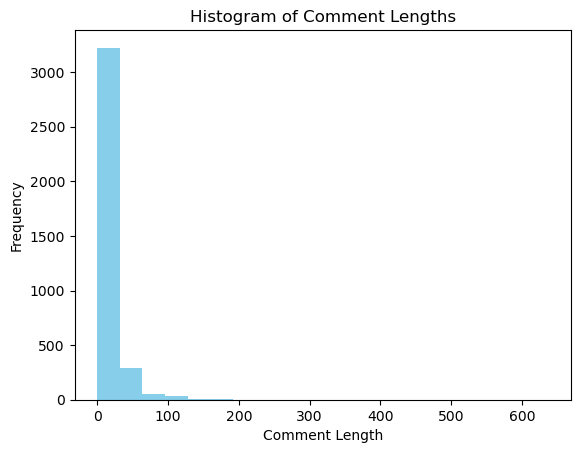

In [53]:
plt.hist(df['text_length'], bins=20, color='skyblue')
plt.title('Histogram of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

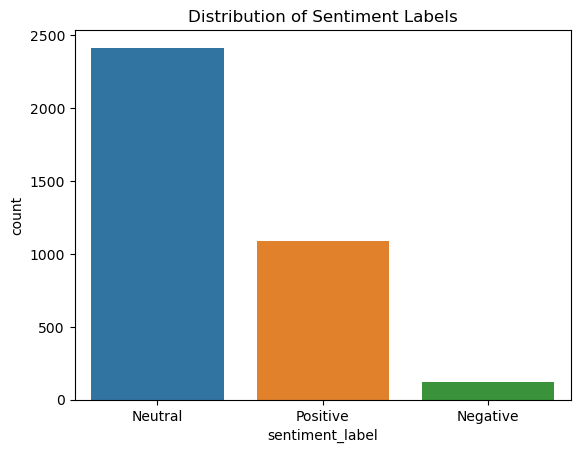

In [55]:
sns.countplot(x='sentiment_label', data=df)
plt.title('Distribution of Sentiment Labels')
plt.show()

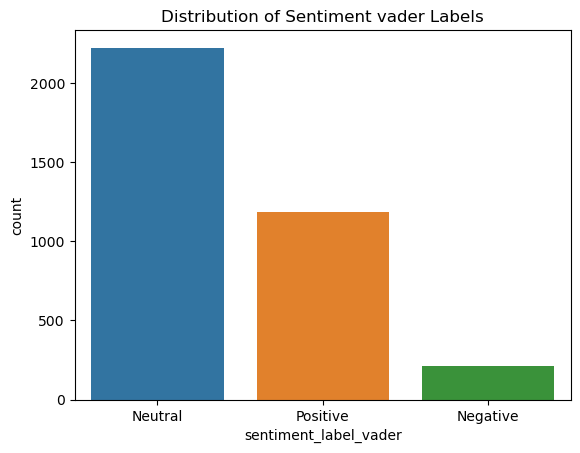

In [56]:
sns.countplot(x='sentiment_label_vader', data=df)
plt.title('Distribution of Sentiment vader Labels')
plt.show()

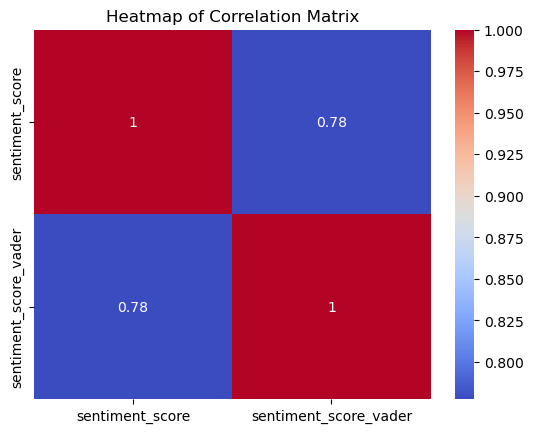

In [57]:
corr = df[['sentiment_score', 'sentiment_score_vader']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

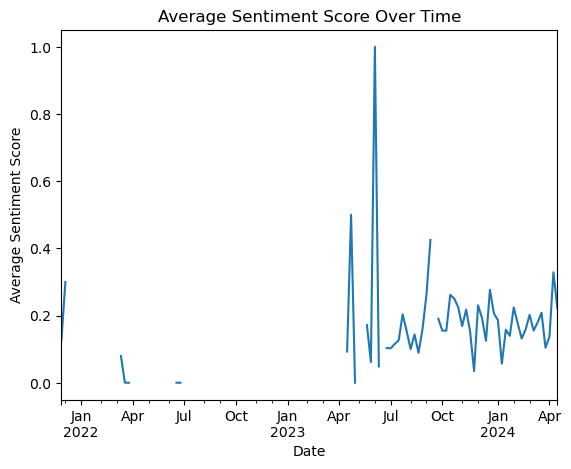

In [58]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.resample('W')['sentiment_score'].mean().plot()
plt.title('Average Sentiment Score Over Time')
plt.ylabel('Average Sentiment Score')
plt.show()


In [65]:
# Select only numeric features
features = [ 'sentiment_score']
X = df[features]

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['sentiment_label'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
def get_svm_metrics(X_train, y_train, X_test, y_test, regularization, kernel, gamma):
  start_time = time()
  # Perform classification with SVM
  svm_classifier = svm.SVC(C = regularization, kernel = kernel, gamma = gamma, probability = True)
  
  # Train Model
  svm_classifier.fit(X_train, y_train)

  # Predict Model
  svm_classifier_prediction = svm_classifier.predict(X_test)
  svm_classifier_prediction_proba = svm_classifier.predict_proba(X_test)

  # Convert probability to class for roc_auc_score in case of binary
  if svm_classifier_prediction_proba.shape[1] == 2: 
    svm_classifier_prediction_proba = np.array([np.argmax(x) for x in svm_classifier_prediction_proba])

  # Report metrics
  accuracy = accuracy_score(y_test, svm_classifier_prediction)
  f1 = f1_score(y_test, svm_classifier_prediction, average = 'weighted')
  auc = roc_auc_score(y_test, svm_classifier_prediction_proba, average = 'weighted', multi_class = 'ovr')
  end_time = time() - start_time

  return accuracy, f1, auc, end_time 

# Call the function with your data
accuracy, f1, auc, time_taken = get_svm_metrics(X_train, y_train, X_test, y_test, 1.0, 'linear', 'auto') 

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("AUC: ", auc)
print("Time taken: ", time_taken)

Accuracy:  0.9930939226519337
F1 Score:  0.9927645445614951
AUC:  1.0
Time taken:  0.10892987251281738


In [86]:
def get_rf_metrics(X_train, y_train, X_test, y_test, n_trees = 100, max_depth = None, max_features = "sqrt", criterion = "gini"):
    start_time = time()
    # Perform classification with RF
    rf_classifier = RandomForestClassifier(n_estimators = n_trees, max_depth = max_depth, max_features = max_features, criterion = criterion)
    # Train Model
    rf_classifier.fit(X_train, y_train)
    # Predict Model
    rf_classifier_prediction = rf_classifier.predict(X_test)
    rf_classifier_prediction_proba = rf_classifier.predict_proba(X_test)

    # Convert probability to class for roc_auc_score in case of binary
    if rf_classifier_prediction_proba.shape[1] == 2: 
        rf_classifier_prediction_proba = np.array([np.argmax(x) for x in rf_classifier_prediction_proba])

    # Report metrics
    accuracy = accuracy_score(y_test, rf_classifier_prediction)
    f1 = f1_score(y_test, rf_classifier_prediction, average = 'weighted')
    auc = roc_auc_score(y_test, rf_classifier_prediction_proba, average = 'weighted', multi_class = 'ovr')
    end_time = time() - start_time

    return accuracy, f1, auc, end_time

# Call the function with your data
accuracy, f1, auc, time_taken = get_rf_metrics(X_train, y_train, X_test, y_test, n_trees = 10)
print(f"Accuracy: {accuracy}, F1 Score: {f1}, AUC: {auc}, Time taken: {time_taken}")


Accuracy: 1.0, F1 Score: 1.0, AUC: 1.0, Time taken: 0.026556015014648438


In [87]:
# Make predictions
y_pred = model.predict(X_test)

# Print the precision, recall, and F1-score
print(classification_report(y_test, y_pred))

# Or calculate them individually
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Precision: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       490
           2       1.00      1.00      1.00       216

    accuracy                           1.00       724
   macro avg       1.00      1.00      1.00       724
weighted avg       1.00      1.00      1.00       724

Precision:  1.0
Recall:  1.0
F1-score:  1.0


In [88]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Define your SVM model
clf = svm.SVC()

# Now you can use 'clf' in cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())


Cross-validation scores:  [0.99585635 0.99723757 0.99723757 0.99308437 0.99861687]
Mean cross-validation score:  0.9964065473051971


<module 'matplotlib.pyplot' from 'C:\\Users\\angie\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

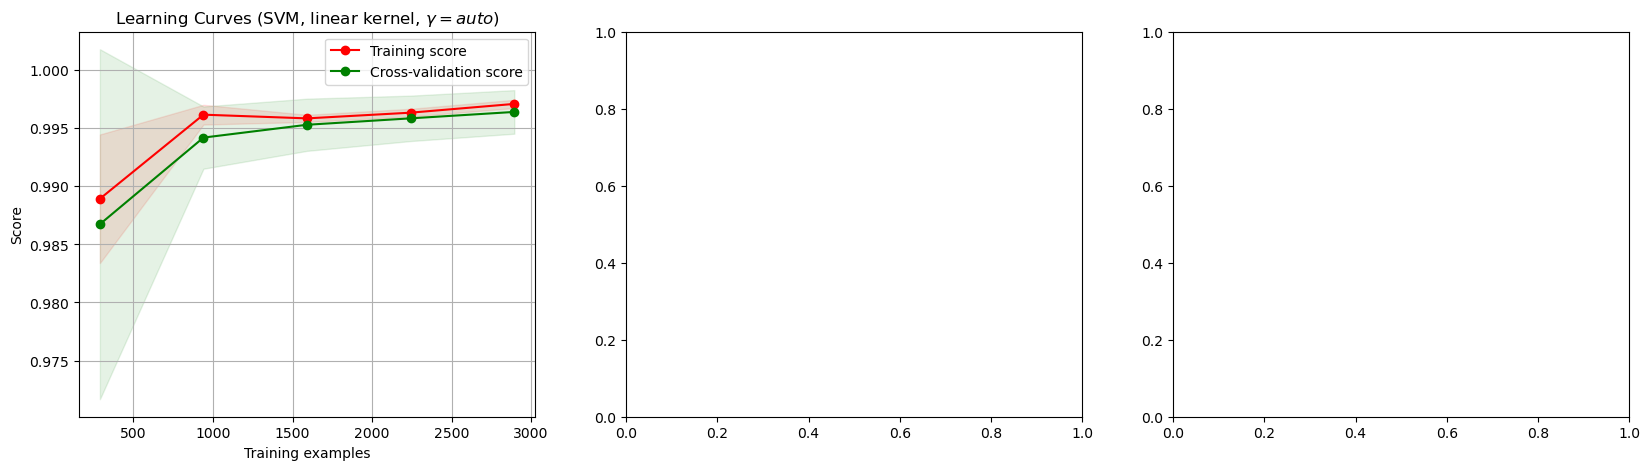

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    return plt

# Assume 'clf' is your classifier and 'X' is your feature data and 'y' is your target labels
cv = 5 # Number of folds for cross-validation
title = "Learning Curves (SVM, linear kernel, $\gamma=auto$)"
plot_learning_curve(clf, title, X, y, cv=cv, n_jobs=4)


In [91]:
def get_dt_metrics(X_train, y_train, X_test, y_test, max_depth = None, max_features = None, criterion = "gini"):
    start_time = time()
    # Perform classification with Decision Tree
    dt_classifier = DecisionTreeClassifier(max_depth = max_depth, max_features = max_features, criterion = criterion)
    # Train Model
    dt_classifier.fit(X_train, y_train)
    # Predict Model
    dt_classifier_prediction = dt_classifier.predict(X_test)
    dt_classifier_prediction_proba = dt_classifier.predict_proba(X_test)

    # Convert probability to class for roc_auc_score in case of binary
    if dt_classifier_prediction_proba.shape[1] == 2: 
        dt_classifier_prediction_proba = np.array([np.argmax(x) for x in dt_classifier_prediction_proba])

    # Report metrics
    accuracy = accuracy_score(y_test, dt_classifier_prediction)
    f1 = f1_score(y_test, dt_classifier_prediction, average = 'weighted')
    auc = roc_auc_score(y_test, dt_classifier_prediction_proba, average = 'weighted', multi_class = 'ovr')
    end_time = time() - start_time

    return accuracy, f1, auc, end_time

# Call the function with your data
accuracy, f1, auc, time_taken = get_dt_metrics(X_train, y_train, X_test, y_test)
print(f"Accuracy: {accuracy}, F1 Score: {f1}, AUC: {auc}, Time taken: {time_taken}")

Accuracy: 1.0, F1 Score: 1.0, AUC: 1.0, Time taken: 0.008506298065185547


In [101]:
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import torch.nn as nn

# Your data of comments and sentiments
comments = df['Comments'].tolist()  # List of comments
sentiments = df['sentiment_label'].tolist()  # List of corresponding sentiments

# Split the data into training and test sets
train_comments, test_comments, train_sentiments, test_sentiments = train_test_split(comments, sentiments, test_size=0.2, random_state=42)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize comments and encode sentiment labels
train_encodings = tokenizer(train_comments, truncation=True, padding=True)
test_encodings = tokenizer(test_comments, truncation=True, padding=True)

# Check the unique values of the labels
unique_sentiments = set(sentiments)
print("Unique label values:", unique_sentiments)

# Encode the labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_sentiments)
test_labels_encoded = label_encoder.transform(test_sentiments)

# Check the alignment of the training data and labels
assert len(train_comments) == len(train_labels_encoded), "Sizes of training data and labels do not match."
assert len(test_comments) == len(test_labels_encoded), "Sizes of test data and labels do not match."

# Convert the labels to tensors
train_labels = torch.tensor(train_labels_encoded)
test_labels = torch.tensor(test_labels_encoded)

# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(unique_sentiments))

# Use the CrossEntropyLoss function for multi-class classification
criterion = nn.CrossEntropyLoss()

# Define training parameters
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Transfer data to the GPU (if available)
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),  # Input IDs
    torch.tensor(train_encodings['attention_mask']),  # Attention masks
    torch.tensor(train_labels)  # Labels
)
test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_encodings['input_ids']),  # Input IDs
    torch.tensor(test_encodings['attention_mask']),  # Attention masks
    torch.tensor(test_labels)  # Labels
)

# Training the model
model.to(device)
model.train()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)

for batch in train_loader:
    input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
    optimizer.zero_grad()
    outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
    loss = outputs.loss
    loss.backward()
    optimizer.step()

# Evaluation of the model
model.eval()

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)
predictions = []
true_labels = []

for batch in test_loader:
    input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions.extend(torch.argmax(logits, dim=1).tolist())
    true_labels.extend(labels.tolist())

# Calculate the model accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')


Unique label values: {'Negative', 'Positive', 'Neutral'}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\angie\AppData\Local\Temp\ipykernel_18404\3164260991.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(train_labels)  # Labels
C:\Users\angie\AppData\Local\Temp\ipykernel_18404\3164260991.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(test_labels)  # Labels


Accuracy: 0.91


In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Prepare your data
comments = df['Comments'].tolist()  # List of comments
sentiments = df['sentiment_label'].tolist()  # List of corresponding sentiments

# Encode the labels
encoder = LabelEncoder()
sentiments = encoder.fit_transform(sentiments)

# One-hot encode the labels
sentiments = to_categorical(sentiments)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(comments, sentiments, test_size=0.2, random_state=42)

# Tokenize and pad your input data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=maxlen))
model.add(LSTM(units=50))
model.add(Dense(len(sentiments[0]), activation='softmax'))  # The output layer size should match the number of classes

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')



Epoch 1/10


C:\Users\angie\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6499 - loss: 0.8413 - val_accuracy: 0.6768 - val_loss: 0.7207
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6544 - loss: 0.7569 - val_accuracy: 0.6768 - val_loss: 0.7171
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6498 - loss: 0.7690 - val_accuracy: 0.6768 - val_loss: 0.7207
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6623 - loss: 0.7550 - val_accuracy: 0.6768 - val_loss: 0.7263
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6677 - loss: 0.7425 - val_accuracy: 0.6768 - val_loss: 0.7228
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6665 - loss: 0.7413 - val_accuracy: 0.6768 - val_loss: 0.7210
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6564 - loss: 0.7596 - val_accuracy: 0.6768 - val_loss: 0.7196
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6770 - loss: 0.7382 - val_accuracy: 0.6768 - val_loss: 0.

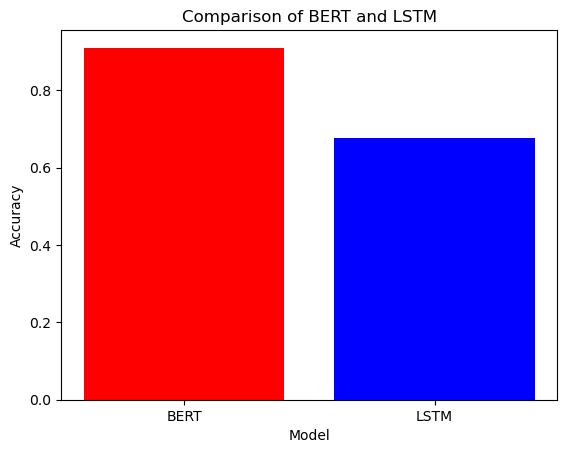

In [108]:
# Accuracy values
bert_accuracy = 0.91
lstm_accuracy = 0.677

# Model names
models = ['BERT', 'LSTM']

# Accuracy
accuracy = [bert_accuracy, lstm_accuracy]

# Create bar chart
plt.bar(models, accuracy, color=['red', 'blue'])

# Add title and labels
plt.title('Comparison of BERT and LSTM')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the chart
plt.show()